# Transmission Spectra over Wavelengths Varying Thicknesses

We demonstrate transmission spectra over wavelengths, varying silver thicknesses on top of a glass substrate.

First of all, the packages required for this example are imported.

In [1]:
import numpy as onp
import jax.numpy as jnp
import matplotlib.pyplot as plt

import jaxlayerlumos as jll
import jaxlayerlumos.utils_materials as jll_utils_materials
import jaxlayerlumos.utils_spectra as jll_utils_spectra
import jaxlayerlumos.utils_units as jll_utils_units

The next cell is to retrieve frequencies and wavelengths.

In [2]:
frequencies = jll_utils_spectra.get_frequencies_visible_light()
wavelengths = jll_utils_spectra.convert_frequencies_to_wavelengths(frequencies)

It defines the thicknesses considered in this example. It has 50 thicknesses from 1 nm to 100 nm. Then, thicknesses of 0 nm are added for air and substrate layers, and the thicknesses in nanometers are converted to the thicknesses in meters.

In [3]:
all_thicknesses = jnp.linspace(1.0, 100.0, 50)[..., jnp.newaxis]
all_thicknesses = jnp.concatenate([
    jnp.zeros_like(all_thicknesses),
    all_thicknesses,
    jnp.zeros_like(all_thicknesses),
], axis=1)
all_thicknesses = jll_utils_units.convert_nm_to_m(all_thicknesses)

Then, it defines a material layout and an incidence angle. In addition, ($n$, $k$) values are obtained.

In [4]:
materials = ['Air', 'Ag', 'FusedSilica']
angle = jnp.array([0.0])

n_k = jll_utils_materials.get_n_k(materials, frequencies)

Finally, we calculate transmission spectra over wavelengths (or equivalently frequencies) varying silver thicknesses.

In [5]:
transmission_spectra = []

for thicknesses in all_thicknesses:
    _, T_TE, _, T_TM = jll.stackrt(n_k, thicknesses, frequencies, angle)

    T_TE = jnp.squeeze(T_TE, axis=0)
    T_TM = jnp.squeeze(T_TM, axis=0)
    T_avg = (T_TE + T_TM) / 2.0

    transmission_spectra.append(T_avg)

transmission_spectra = onp.array(transmission_spectra)
thicknesses_silver = onp.array(all_thicknesses[:, 1])

X, Y = onp.meshgrid(wavelengths, thicknesses_silver)

The spectra over wavelengths and silver thicknesses are plotted.

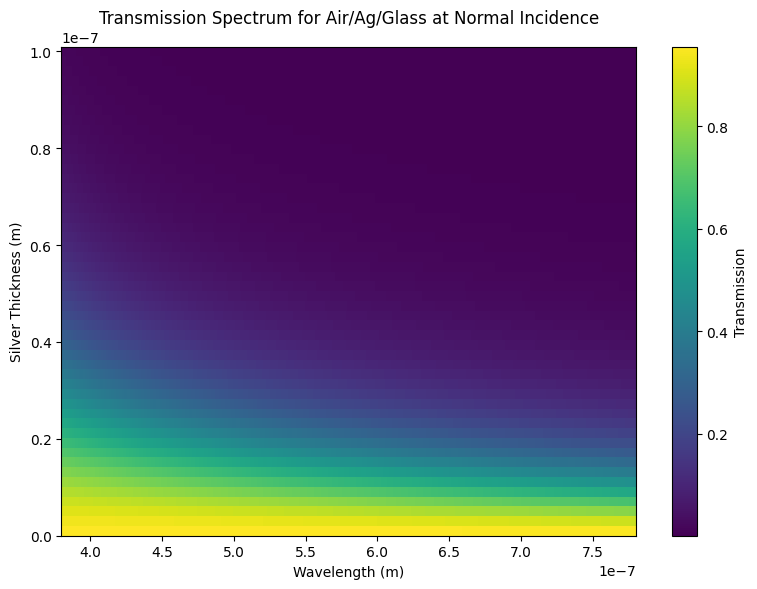

In [6]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()

mesh = ax.pcolormesh(X, Y, transmission_spectra)
fig.colorbar(mesh, label="Transmission")

ax.set_xlabel("Wavelength (m)")
ax.set_ylabel("Silver Thickness (m)")
ax.set_title("Transmission Spectrum for Air/Ag/Glass at Normal Incidence")

plt.tight_layout()
plt.show()